# 5주차 데이터 수집 (크롤링)

데이터를 수집하는 방법은 여러가지가 있습니다. csv(comma seperated values)나 엑셀과 같이 이미 정리된 [파일 형식으로 데이터](http://datalab.naver.com/)를 얻을 수도 있고, Database나 [API](https://developers.naver.com/products/login/api)를 통해 얻을수도 있지만, 오늘은 **웹 크롤링**을 통해 데이터를 수집하는 방법에 대해서 배워보겠습니다. Web crawling은 Web scraping라고도 말하는데, 위키피디아에 따르면 **'조직적이고 자동화된 방법으로 월드 와이드 웹을 탐색하는 방법’**이라고 나와있네요. HTML 파일을 긁어서 필요한 정보들만 뽑아 csv 파일로 저장하는 방법에 대해 배워보겠습니다.

웹사이트 크롤링을 하기 위해선 **우선 웹사이트를 구성하고 있는 HTML, CSS**에 대한 기본적인 지식이 필요합니다.

## HTML과 CSS에 대한 기본 지식
- [W3School](http://www.w3schools.com/html/)
- [codeacademy](https://www.codecademy.com/learn/web)

### 1. 파이참에서 index.html파일을 만들어봅시다.

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Title</title>
</head>
<body>

</body>
</html>
```

### 2. 바꿔봅시다!

```html
<!DOCTYPE html>
<html>
<head>
    <meta charset="UTF-8">
    <title>파이썬 클래스</title>
    <meta property="og:title" content="페이스북이나 카톡 미리보기에서 보이는 제목입니다." />
    <meta property="og:description" content="og 설명" />
    <meta property="og:image" content="og 이미지" />
    <style>
        body {
            background-color: #d0e4fe;
        }

        h1 {
            color: orange;
            text-align: center;
        }

        .desc-box {
            text-align: center;
        }

        #desc-important {
            color: blue;
        }
    </style>
</head>
<body>

<h1>파이썬 2016 클래스입니다.</h1>

<div class="desc-box">
    <p>오늘은 <b id="crawling">크롤링</b>에 대해 배우고 있습니다.</p>

    <div>
        <img src="http://movement-as-medicine.com/wp-content/uploads/2014/01/baby-crawling.jpg"/>
    </div>

    <span>크롤링에 대한 자세한 정의는 <a href="https://en.wikipedia.org/wiki/Web_crawler">위키피디아</a>를 참고해보세요.</span>

    <div class="desc-line first">
        <span>웹 크롤링을 하려면 html과 css에 대해 먼저 알아야 합니다.</span>
        <a href="http://www.w3schools.com/html/">w3school 페이지에서 HTML, CSS에 대해 알아볼 수 있어요</a>
    </div>
    <div class="desc-line second">
        <span><b id="desc-important">Javascript</b>는 웹페이지를 동적으로 만들어주는 역할을 합니다.</span>
    </div>
</div>

</body>
</html>
```

1. 마우스 오른쪽 버튼 -> 검사
2. 마우스 오른쪽 버튼 -> Copy -> CSS Selector
3. body > div > div.desc-line.second

### 3. style 태그 대신 style.css 파일에 정리해둘 수도 있습니다.
`<head>`에 추가해주세요.

```html
<link rel="stylesheet" href="style.css">
```



## 오늘 수업에 필요한 패키지를 설치해주세요
```
> pip install beautifulsoup4
> pip install requests
> pip install numpy
> pip install pandas
```

개발 도중 사용법에 대해 궁금한 것들이 있으면 Document를 참고해보세요.
- [beautifulsoup4](http://coreapython.hosting.paran.com/etc/beautifulsoup4.html): HTML로 부터 데이터를 뽑아내기 위한 라이브러리입니다.
- [requests](http://docs.python-requests.org/en/master/): requests.get을 통해 HTML을 받아올 수 있습니다.
- [numpy](http://www.numpy.org/): numpy 패키지는 ndarray라는 파워풀한 자료구조를 지원하며, 각종 수치 컴퓨팅 관련 메소드를 지원합니다.
- [pandas](http://pandas.pydata.org/): 데이터 분석 라이브러리입니다.

In [117]:
# 뷰티플수프는 HTML에서 원하는 데이터를 쉽게 뽑아낼 수 있는 파이썬 라이브러리입니다.
from bs4 import BeautifulSoup as bs

In [118]:
# 우리가 만든 index.html부터 살펴봅시다.
soup = bs(open('./index.html'))

In [119]:
# soup 객체로부터 쉽게 parsing된 데이터들을 받아올 수 있습니다.

# title 태그를 받아옵니다.
print soup.title

# 태그 이름을 받아옵니다.
print soup.title.name

# 태그 내 문자열을 가져옵니다.
print soup.title.text

# 부모 태그를 가져옵니다.
print soup.title.parent.name

# p 태그를 가져옵니다.
print soup.p

<title>파이썬 클래스</title>
title
파이썬 클래스
head
<p>오늘은 <b id="crawling">크롤링</b>에 대해 배우고 있습니다.</p>


In [120]:
# 모든 a 태그 가져오기
print soup.find_all('a')

[<a href="https://en.wikipedia.org/wiki/Web_crawler">위키피디아</a>, <a href="http://www.w3schools.com/html/">w3school 페이지에서 HTML, CSS에 대해 알아볼 수 있어요</a>]


In [121]:
# 클래스명으로 가져오기
print soup.select('.desc-box')

# id로 가져오기
print soup.select('#desc-important')

# CSS path로 가져오기
print soup.select('body > div > div.desc-line.first > span')

# 속성(attr)으로 가져오기
print soup.findAll('a', {'href': 'http://www.w3schools.com/html/'})

# 클래스명도 속성 중 하나이기 때문에 이런식으로 가져올 수 있습니다.
print soup.findAll('div', {'class': 'desc-line'})

[<div class="desc-box">
<p>오늘은 <b id="crawling">크롤링</b>에 대해 배우고 있습니다.</p>
<div>
<img src="http://movement-as-medicine.com/wp-content/uploads/2014/01/baby-crawling.jpg"/>
</div>
<span>크롤링에 대한 자세한 정의는 <a href="https://en.wikipedia.org/wiki/Web_crawler">위키피디아</a>를 참고해보세요.</span>
<div class="desc-line first">
<span>웹 크롤링을 하려면 html과 css에 대해 먼저 알아야 합니다.</span>
<a href="http://www.w3schools.com/html/">w3school 페이지에서 HTML, CSS에 대해 알아볼 수 있어요</a>
</div>
<div class="desc-line second">
<span><b id="desc-important">Javascript</b>는 웹페이지를 동적으로 만들어주는 역할을 합니다.</span>
</div>
</div>]
[<b id="desc-important">Javascript</b>]
[<span>웹 크롤링을 하려면 html과 css에 대해 먼저 알아야 합니다.</span>]
[<a href="http://www.w3schools.com/html/">w3school 페이지에서 HTML, CSS에 대해 알아볼 수 있어요</a>]
[<div class="desc-line first">
<span>웹 크롤링을 하려면 html과 css에 대해 먼저 알아야 합니다.</span>
<a href="http://www.w3schools.com/html/">w3school 페이지에서 HTML, CSS에 대해 알아볼 수 있어요</a>
</div>, <div class="desc-line second">
<span><b id="desc-important">Javascript</b>는 웹

In [122]:
# 자, 이제 필요한 HTML 태그를 뽑는 것 까지 가능합니다. 
# 태그 안에 속성(src, href 등)이나 text를 뽑아내는 방법에 대해 알아봅시다. 

# text만 뽑아내기
second_line = soup.select('.desc-line.second')
print second_line[0].text

# a 태그 href 뽑아내기
a_tag = soup.select('body > div > span > a')
print a_tag[0].attrs
print a_tag[0]['href']

# img 태그 src 뽑아내기
image_tag = soup.select('img')
print image_tag[0].attrs
print image_tag[0]['src']


Javascript는 웹페이지를 동적으로 만들어주는 역할을 합니다.

{'href': 'https://en.wikipedia.org/wiki/Web_crawler'}
https://en.wikipedia.org/wiki/Web_crawler
{'src': 'http://movement-as-medicine.com/wp-content/uploads/2014/01/baby-crawling.jpg'}
http://movement-as-medicine.com/wp-content/uploads/2014/01/baby-crawling.jpg


이제 **beautifulsoup 기본기**는 닦은 것 같습니다. **requests** 라이브러리를 사용해 월드 와이드 웹 세상의 html을 받아옵시다.

In [62]:
# pip를 통해 설치한 requests를 import합니다.
import requests

In [123]:
# 무료 이미지들을 크롤링해봅시다.
res = requests.get('https://pixabay.com/en/')

# dir()은 해당 객체의 사용 가능한 속성(attributes)를 list로 리턴해줍니다.
# print dir(res) 

# HTTP 요청을 보내면 응답으로 Status Code가 오게 됩니다.
# 200: 성공
# 404: 페이지 없음
# 500: 서버 오류
# => https://ko.wikipedia.org/wiki/HTTP_%EC%83%81%ED%83%9C_%EC%BD%94%EB%93%9C

# HTTP란 WWW에서 사용하는 약속(protocol)입니다. 
# 여러분들의 컴퓨터(클라이언트)와 네이버의 컴퓨터(서버)가 통신을 하는데 있어, 
# '어떤 메시지 형식으로 주고 받을 것이다.'하고 약속을 하고 0101..의 이진수를 주고 받는 것 이지요.
# 이러한 약속을 미리 공유하고 있어야 메시지를 올바르게 해석할 수 있습니다.

# 200번이면 성공적으로 잘 받아온겁니다.
print res.status_code

200


In [125]:
# bs(open('./index.html')) 했던 것 처럼, index.html 자리에 res.text를 넣어줍니다.
pixabay_html = bs(res.text)

# 메인 페이지의 이미지를 받아서, 로컬 컴퓨터에 저장해보세요.
# 이미지를 로컬 컴퓨터에 다운받으려면 urllib 라이브러리를 사용하면 됩니다.
import urllib
def download_image(img_src, filename):
    res = urllib.urlretrieve(img_src, filename)
    return res

In [126]:
def crawl_page(url, selector):
    res = requests.get(url)

    if res.status_code == 200:
        soup = bs(res.text)
        items = soup.select(selector)

        return items

## imdb에서 영화 정보 크롤링해보기

타겟 URL: http://www.imdb.com/movies-coming-soon/2016-01/

이곳에 들어가면 영화 제목, 장르, 평점, 감독, 배우 등의 정보가 있습니다. URL도 2015-01, 2015-02.. 이런식으로 바꿀 수 있습니다. 우선 2016-01 영화 정보를 함께 크롤링해봅시다.

In [131]:
# 그러면 이제 2015-01부터 2015-12까지 영화정보를 긁어봅시다.
target_url = 'http://www.imdb.com/movies-coming-soon/{0}'
movie_total = []
for i in range(1,13):
    # string.zfill(2)을 사용해보세요. zero padding이 생깁니다.
    print "2015-" + str(i).zfill(2) + " crawling.."
    movie_total += movie_crawler(target_url.format("2015-" + str(i).zfill(2)))

2015-01 crawling..
2015-02 crawling..
2015-03 crawling..
2015-04 crawling..
2015-05 crawling..
2015-06 crawling..
2015-07 crawling..
2015-08 crawling..
2015-09 crawling..
2015-10 crawling..
2015-11 crawling..
2015-12 crawling..


In [132]:
# page를 순회하며 계속해서 사용할 코드이므로, 함수로 만들어봅시다.
def movie_crawler(url):
    movies = crawl_page(url, '#main > div > div.list.detail > div')

    # title, image, running_time, score, genre, directors, actors
    table = []
    for movie in movies:
        row = []
        # ... 여기 코드를 입력해주세요.
        table.append(row)
        
    return table

jan_2016 = movie_crawler('http://www.imdb.com/movies-coming-soon/2016-01')

In [133]:
# 2016-01 데이터도 추가해줍시다.
movie_total += jan_2016

In [135]:
# 데이터를 확인합니다.
# print len(movie_total)
# print movie_total[0]

In [142]:
# csv 파일로 바꿔봅시다. 
import csv

# https://docs.python.org/2/library/csv.html#csv.reader
# qoutechar, qouting 옵션이 뭔지 직접 해봅시다.
with open('sample.csv', 'wb') as csvfile:
    writer = csv.writer(csvfile, delimiter=',',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    
    writer.writerow(['Spam'] * 5 + ['Baked, Beans'])
    writer.writerow(['Spam', 'Lovely, Spam', 'Wonderful Spam'])

In [143]:
# movie_total을 csv로 저장해봅시다.

In [144]:
# 저장된 csv 파일을 읽고, print 찍어봅시다.
with open('sample.csv', 'rb') as csvfile:
    movie_reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in movie_reader:
        print row

['Spam', 'Spam', 'Spam', 'Spam', 'Spam', 'Baked, Beans']
['Spam', 'Lovely, Spam', 'Wonderful Spam']


In [ ]:
# 자, 이제 파이썬 데이터 분석툴 pandas 소개합니다.
from pandas import DataFrame

In [ ]:
movie_df = DataFrame(movie_total, columns=['title', 'image', 'running time', 'score', 'genre', 'directors', 'actors'])

In [ ]:
movie_df

In [ ]:
# csv format으로 저장하기 (encoding utf-8)
movie_df.to_csv('./movie_from_df.csv', encoding='utf-8', index=False)

## 해보기

url: http://www.imdb.com/search/name?birth_monthday=1-21&ref_=nm_ov_bth_monthday&refine=birth_monthday&start=51

자신의 생일과 같은 사람들 영화관계자 200명을 DataFrame으로 옮겨보고, csv 파일로도 저장해봅시다. (row => name, image, job, major_work)

# iPython notebook 설치하기

numpy와 pandas는 파이썬 데이터 분석에 가장 많이 활용되는 패키지입니다. 앞으로 raw 데이터를 다루고 분석하는데 Pandas를 주로 사용하겠지만, Pandas는 numpy 자료구조에 dependency가 있습니다. numpy는 수치 연산에 강력한 ndarray 자료구조와 각종 메소드들을 지원합니다.

pip를 사용하여 numpy, pandas, ipython 패키지를 설치해봅시다.

```    
pip install numpy

pip install pandas

pip install ipython[all]
```

참고: https://ipython.org/ipython-doc/2/install/install.html   

안되시는 분들은 [hunjae.com:8989](hunjae.com:8989)에 접속해서 ipython notebook을 사용해주세요

- ID: python2016
- PW: python2016

## Pandas 맛보기

In [145]:
# 데이터를 가져와봅시다.
import pandas

In [146]:
# http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights
# 위 사이트에 들어가서 표를 긁어서 복사(ctrl+c, 맥에서는 cmd+c) 합니다.
baseball_players = pandas.read_clipboard()

In [147]:
# DataFrame의 head() 메소드를 활용해 잘 붙었는지 확인해볼까요? 
baseball_players.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180,22.99
1,Paul_Bako,BAL,Catcher,74,215,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188,35.71


In [148]:
# 긁어온 데이터를 csv로 저장해봅시다.
baseball_players.to_csv('./baseball_player.csv', index=False)

In [200]:
# 저장한 .csv 데이터를 다시 읽어볼까요? 현재 폴더에 가서 잘 있는지 확인해봅시다.
bp_data = pandas.read_csv('./baseball_player.csv')

In [201]:
bp_data.head()

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180,22.99
1,Paul_Bako,BAL,Catcher,74,215,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188,35.71


In [202]:
# Column들을 가져옵니다.
bp_data.columns

Index([u'Name', u'Team', u'Position', u'Height(inches)', u'Weight(pounds)',
       u'Age'],
      dtype='object')

In [211]:
# Column명을 바꾸려면 어떻게 해야할까요?
bp_data.rename(columns={'Height(inches)':'Height', 'Weight(pounds)': 'Weight'}, inplace=True)

In [234]:
# [row, column] index로 데이터를 고를수 도 있습니다.
print bp_data.ix[1,:]
print bp_data.ix[:,4].head()
print type(bp_data.ix[:,1])
print type(bp_data.ix[4,:])

Name        Paul_Bako
Team              BAL
Position      Catcher
Height             74
Weight            215
Age             34.69
Name: 1, dtype: object
0    180
1    215
2    210
3    210
4    188
Name: Weight, dtype: float64
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [241]:
# Series는 index(label)와 value로 이루어져 있는 One-dimensional ndarray 입니다. 
heights = bp_data['Height']
heights.head()

0    74
1    74
2    72
3    72
4    73
Name: Height, dtype: int64

In [263]:
# 이렇게 index도 받아올 수 있습니다.
print heights.index

# numpy ndarray 자료구조로 value들을 리턴합니다.
print heights.values

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033],
           dtype='int64', length=1034)
[74 74 72 ..., 75 75 73]


In [268]:
# inch를 cm로 바꿔봅시다.
inch_to_cm = 2.54
heights[:10] * inch_to_cm

0    187.96
1    187.96
2    182.88
3    182.88
4    185.42
5    175.26
6    175.26
7    180.34
8    193.04
9    180.34
Name: Height, dtype: float64

In [266]:
# 일단 Series 자료구조를 우리에게 익숙한 list로 바꿔봅시다.
height_list = heights.tolist()

In [272]:
# 예전에 배웠던 list comprehension을 사용할 수 있겠죠!
[i*inch_to_cm for i in height_list][:10]

[187.96000000000001,
 187.96000000000001,
 182.88,
 182.88,
 185.42000000000002,
 175.25999999999999,
 175.25999999999999,
 180.34,
 193.03999999999999,
 180.34]

In [163]:
np_heights = np.array(height_list)
np_heights

array([74, 74, 72, ..., 75, 75, 73])

In [164]:
cm_heights = np_heights*inch_to_cm
cm_heights

array([ 187.96,  187.96,  182.88, ...,  190.5 ,  190.5 ,  185.42])

### 연습문제 1.

야구선수들의 bmi(body mass index)를 구해봅시다. 

$$bmi = weight(kg) / height(m^2)$$

In [276]:
# 1. 일단 bp_data로 부터 weight를 가져오고, numpy ndarray로 만듭니다. pounds->kg으로 바꿔주세요.
kg_weights = bp_data['Weight'].values*0.453592

In [281]:
# ndarray자료구조인 weight, height를 받아 bmi를 계산해서 리턴합니다. kg, m^2 단위 조심하세요!
def cal_bmi(weight, height):
    bmi = 0
    # ...
    bmi = weight/height**2
    return bmi

In [282]:
m_heights = cm_heights*0.01

In [283]:
bmi = cal_bmi(kg_weights, m_heights)

In [284]:
# 몸무게 적게 나가는 야구선수 구하기
bmi[bmi<21]

array([ 20.54255679,  20.54255679,  20.69282047,  20.69282047,
        20.34343189,  20.34343189,  20.69282047,  20.15883472,
        19.4984471 ,  20.69282047,  20.9205219 ])

list와 numpy ndarray가 뚜렷하게 차이나는 점.

1. ndarray는 하나의 type만 넣을 수 있음.(type coercion)
2. 기본 연산(+,*,-,+)이 다른 의미를 가짐

In [285]:
print [1,2,3]+[4,5,6]
print [1,2,3]*3

[1, 2, 3, 4, 5, 6]
[1, 2, 3, 1, 2, 3, 1, 2, 3]


In [286]:
print np.array([1,2,3])+np.array([4,5,6])
print np.array([1,2,3])*3

[5 7 9]
[3 6 9]


## 2D Array (N-D Array)

In [287]:
# 일단 우리가 아는 list로 2D를 만들어봅시다.
baseball = [[180, 78.4],
            [215, 102.7],
            [210, 98.5],
            [188, 75.2]]

In [288]:
np_baseball = np.array(baseball)
np_baseball

array([[ 180. ,   78.4],
       [ 215. ,  102.7],
       [ 210. ,   98.5],
       [ 188. ,   75.2]])

In [289]:
# shape는 몇행 몇열인지 알려줍니다.
np_baseball.shape

(4, 2)

In [175]:
# 위의 데이터를 가지고 첫번째 column은 height, 두번째 column은 weight인 2차 행렬을 만들어봅시다.
baseball_player = np.array([kg_weights, m_heights])

In [176]:
# 음? 이건 저희가 원하는게 아니죠
baseball_player.shape

(2, 1034)

In [177]:
print baseball_player

[[ 81.64656  97.52228  95.25432 ...,  92.98636  86.18248  88.45044]
 [  1.8796    1.8796    1.8288  ...,   1.905     1.905     1.8542 ]]


In [178]:
# ndarray는 Transpose 메소드를 지원합니다.
baseball_player = baseball_player.T

In [179]:
# 완성!
baseball_player.shape

(1034, 2)

In [290]:
# subset을 구할땐, 행->열 순입니다. 5번째 선수의 키는 이렇게..
baseball_player[4,1]

1.8542000000000003

In [181]:
# 키만 가지고 오고 싶을땐 이렇게..
baseball_player[:,1]

array([ 1.8796,  1.8796,  1.8288, ...,  1.905 ,  1.905 ,  1.8542])

In [293]:
np_baseball_with_bmi = np.array([kg_weights, cm_heights, bmi]).T

In [294]:
# numpy가 지원하는 착한 메소드들.. r
np.mean(np_baseball_with_bmi[:,0])

nan

In [184]:
# 숫자가 아닌 녀석들을 찾을땐 np.isnan
np.isnan(np_baseball_with_bmi[:,0])

array([False, False, False, ..., False, False, False], dtype=bool)

In [185]:
# 숫자인 녀석들을 찾아야하므로 앞에 ~
~np.isnan(np_baseball_with_bmi[:,0])

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [186]:
no_nan_data = np_baseball_with_bmi[~np.isnan(np_baseball_with_bmi[:,0])]

In [187]:
np.mean(no_nan_data[:,0])

91.484632371732815

In [188]:
np.median(no_nan_data[:,0])

90.718400000000003

In [189]:
np.std(no_nan_data[:,0])

9.5169624670692663

In [190]:
np.corrcoef(no_nan_data[:,0], no_nan_data[:,1])

array([[ 1.        ,  0.53188586],
       [ 0.53188586,  1.        ]])

In [191]:
no_nan_data

array([[  81.64656   ,  187.96      ,   23.11037639],
       [  97.52228   ,  187.96      ,   27.60406069],
       [  95.25432   ,  182.88      ,   28.48080465],
       ..., 
       [  92.98636   ,  190.5       ,   25.62295933],
       [  86.18248   ,  190.5       ,   23.74810865],
       [  88.45044   ,  185.42      ,   25.72686361]])

In [192]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

(array([   9.,   71.,   89.,  318.,  175.,  263.,   84.,   14.,    7.,    3.]),
 array([ 170.18 ,  174.244,  178.308,  182.372,  186.436,  190.5  ,
         194.564,  198.628,  202.692,  206.756,  210.82 ]),
 <a list of 10 Patch objects>)

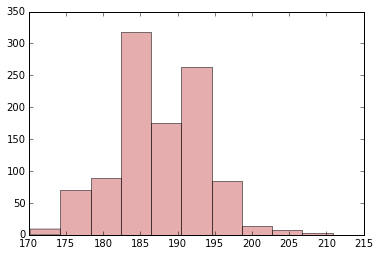

In [193]:
# histogram 그리기
# print plt.hist.__doc__
plt.hist(no_nan_data[:,1], color='indianred', alpha=0.5)